In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
## reusing code from week 09 homework

def normalize_z(df):
    '''Input df, output dfout
    Z Normalizes a dataframe'''
    
    dfout = df.copy()
    dfout = (dfout - df.mean(axis=0)) / df.std(axis=0)
    
    return dfout

# def min_max

def get_features_targets(df, feature_names, target_names):
    '''input: df, ['feature_names'], ['target_names']
    output: df_feature, df_target'''
    
    df_feature = df[feature_names]
    df_target = df[target_names]
    
#     print(type(df_feature))
    
    return df_feature, df_target


def prepare_feature(df_feature):
    '''prepares the feature
    input: df_feature \n output: prepared_df_feature'''
    
    # get the number of columns, number of features
    cols = len(df_feature.columns)
    
    # shape the feature columns
    # why -1 for row? Transpose
    feature = df_feature.to_numpy().reshape(-1, cols)
    rows = feature.shape[0] # get number of rows
    
    # create our ones
    ones = np.ones((rows, 1))
    
    X = np.concatenate((ones, feature), axis=1)
    
    return X


def prepare_target(df_target):
    '''prepares the target
    input: df_target
    output: prepared_target'''
    
    cols = len(df_target.columns)
    target = df_target.to_numpy().reshape(-1, cols)
    return target


def predict(df_feature, beta):
    
    # normalize and prepare the feature
    X = prepare_feature(normalize_z(df_feature))
    
    return calc_linear(X, beta)


def calc_linear(X, beta):
    '''input: X, beta output: y= X cross B'''
    
    return np.matmul(X, beta)


def gradient_descent(X, y, beta, alpha, num_iters):
    '''input: X, y, beta, alpha, num_iters
    output: beta, J_storage(list of all costs computed with using beta)'''
    
    # get number of rows
    m = X.shape[0]
    
    # initialize J storage which stores all the successive iterations of cost function
    J_storage = np.zeros((num_iters, 1))
    
    # compute cost and store in J_storage each succesive iteration of cost function
    for n in range(num_iters):
        deriv = np.matmul(X.T, (calc_linear(X, beta) - y))
        beta = beta - alpha * (1/m) * deriv
        J_storage[n] = compute_cost(X, y, beta)
        
    return beta, J_storage


def compute_cost(X, y, beta):
    
    n = X.shape[0]
    
    # error = yhat - y
    error = calc_linear(X, beta) - y
    error_sq = np.matmul(error.T, error) # transpose the error matrix
    # multiply by itself
    
    J = (1/(2*n)) * error_sq
    
    return J


def split_data(df_feature, df_target, random_state=100, test_size=0.3):
    '''splits data into training and testing
    input: df_feature, df_target, random_state=100, test_size=0.3
    output: df_feature_train, df_feature_test, df_target_train, df_target_test'''
    np.random.seed(random_state)
    n = len(df_feature)
    
    test_num = int(n * (test_size))
    
    test_idx = np.random.choice(n, test_num, replace=False) # all the indexes of the test indexes
    train_idx = [i for i in range(n) if i not in test_idx]
    
    df_feature_test = df_feature.iloc[test_idx]
    df_feature_train = df_feature.iloc[train_idx]
    
    df_target_test = df_target.iloc[test_idx]
    df_target_train = df_target.iloc[train_idx]
    
    return df_feature_train, df_feature_test, df_target_train, df_target_test
  
    
def r2_score(y, ypred):
    '''finds the R^2 score
    input y(np_array) actual values, ypred(np_array) predicted values
    output R^2'''
    
    n = len(y)
    
    y_bar = np.mean(y)
    
    # SS_res = summation (true_y - y_pred)**2
    SS_res = 0
    for true_y, pred_y in zip(y, ypred):
        SS_res += (true_y - pred_y)**2
    
    # SS_tot = summation (true_y - y_bar)**2
    SS_tot = 0
    for true_y in y:
        SS_tot += (true_y - y_bar)**2    
    
    r_2 = 1 - (SS_res / SS_tot)
    
    return r_2
    pass


def mean_squared_error(target, pred):
    '''finds the mean squared error
    input target(np_array), pred(np_array)
    output mean_squared_error'''
    
    n = len(target)
    
    # summation of (actual_y - y_cap)**2
    MSE = 0
    for actual_y, pred_y in zip(target, pred):
        MSE += (actual_y - pred_y)**2
    MSE /= n
    
    return MSE
    pass

How might we estimate the prevalence of moderate and severe food security based on the UN Food and Agricultural Organization’s indices through a country’s GDP per capita, net imports of rice per capita, production of rice per capita and the change in temperature of each country.

Y(Prevalence of food insecurity)

In [3]:
df_food_insecurity = pd.read_csv('Food_insecurity.csv')
df_food_insecurity.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,210091,Prevalence of moderate or severe food insecuri...,20182020,2018-2020,%,63.1,A,Official figure,Official estimate integrated with FAO data
1,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,210091,Prevalence of moderate or severe food insecuri...,20192021,2019-2021,%,70.0,A,Official figure,Official estimate integrated with FAO data
2,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,210091M,Prevalence of moderate or severe food insecuri...,20182020,2018-2020,%,60.2,E,Estimated value,NaN
3,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,210091M,Prevalence of moderate or severe food insecuri...,20192021,2019-2021,%,65.5,E,Estimated value,NaN
4,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,210091F,Prevalence of moderate or severe food insecuri...,20182020,2018-2020,%,74.7,E,Estimated value,NaN


In [4]:
print(df_food_insecurity)

     Domain Code                             Domain  Area Code (M49)  \
0             FS  Suite of Food Security Indicators                4   
1             FS  Suite of Food Security Indicators                4   
2             FS  Suite of Food Security Indicators                4   
3             FS  Suite of Food Security Indicators                4   
4             FS  Suite of Food Security Indicators                4   
...          ...                                ...              ...   
1219          FS  Suite of Food Security Indicators              716   
1220          FS  Suite of Food Security Indicators              716   
1221          FS  Suite of Food Security Indicators              716   
1222          FS  Suite of Food Security Indicators              716   
1223          FS  Suite of Food Security Indicators              716   

             Area  Element Code Element Item Code  \
0     Afghanistan          6121   Value    210091   
1     Afghanistan          61

In [5]:
# change the Years to a single year ie. 2010-2014 to 2012
# remove years and countries with 'Flag' == 'O
# change the food insecurity for each country and year to official data, else lowest estimate, then drop the rest

def clean_food_insecurity(df_in):
    '''input: df_in
    output: df_out'''
    
    df_out = df_in.copy()
    
    ## change the years to a single year if not already
    for i in range(df_out.shape[0]):
        if isinstance(df_out.iloc[i]['Year'], str):
            year_ls = df_out.iloc[i]['Year'].split('-')
            actual_year = sum([int(year) for year in year_ls]) // 2
            df_out.at[i, 'Year'] = actual_year

    ## want only Area_Code (M49), Year, Value and Flag
    df_out = df_out[['Area Code (M49)', 'Year', 'Value', 'Flag']]

    ## remove the years with Flag == 'O'
    df_out = df_out[df_out['Flag'] != 'O']

    df_out = df_out.dropna()
    
    area_codes = df_out['Area Code (M49)'].unique()
    years = df_out['Year'].unique()
    
    for area_code in area_codes:
        for year in years:

            ## if official data available for Area Code and Year, drop estimates
            if 'A' in df_out[(df_out['Area Code (M49)'] == area_code) & (df_out['Year'] == year)]['Flag'].values:
                df_out = df_out.drop(df_out[(df_out['Area Code (M49)'] == area_code) & (df_out['Year'] == year) & (df_out['Flag'] == 'E')].index)
            
            ## elif estimate data available for Area Code and Year, keep only lowest estimate
            elif 'E' in df_out[(df_out['Area Code (M49)'] == area_code) & (df_out['Year'] == year)]['Flag'].values:
                df_out = df_out.drop(df_out[(df_out['Area Code (M49)'] == area_code) & (df_out['Year'] == year) & (df_out['Flag'] == 'E')].index[1:])

    ## drop the Flag column
    df_out = df_out.drop('Flag', axis=1)

    ## rename the column Value to Food_Insecurity
    df_out.rename(columns={'Value': 'Food Insecurity'}, inplace=True)

    return df_out


df_food_insecurity_cleaned = clean_food_insecurity(df_food_insecurity)

print(df_food_insecurity_cleaned.tail())

      Area Code (M49)  Year  Food Insecurity
1201              704  2020              7.6
1212              894  2019             60.3
1213              894  2020             69.5
1218              716  2019             69.8
1219              716  2020             73.0


In [6]:
print(df_food_insecurity_cleaned.shape)

## food insecurity data is now cleaned

(281, 3)


In [7]:
## cleaing gdp data
df_GDP = pd.read_csv('GDP_per_capita.csv')

In [8]:
print(df_GDP.head())

  Domain Code            Domain  Area Code (M49)         Area  Element Code  \
0          MK  Macro Indicators                4  Afghanistan          6119   
1          MK  Macro Indicators                4  Afghanistan          6119   
2          MK  Macro Indicators                8      Albania          6119   
3          MK  Macro Indicators                8      Albania          6119   
4          MK  Macro Indicators               12      Algeria          6119   

                Element  Item Code                    Item  Year Code  Year  \
0  Value US$ per capita      22008  Gross Domestic Product       2019  2019   
1  Value US$ per capita      22008  Gross Domestic Product       2020  2020   
2  Value US$ per capita      22008  Gross Domestic Product       2019  2019   
3  Value US$ per capita      22008  Gross Domestic Product       2020  2020   
4  Value US$ per capita      22008  Gross Domestic Product       2019  2019   

  Unit        Value Flag                         F

In [29]:
def clean_FAO_data(df_in, col_name):
    '''input: df_feature output: df_feature_cleaned'''
    df_out = df_GDP.copy()
    df_out = df_out[['Area Code (M49)', 'Year', 'Value']]

    df_out.rename(columns={'Value': col_name}, inplace=True)

    return df_out

df_GDP_cleaned = clean_FAO_data(df_GDP, 'GDP per capita')

print(df_GDP_cleaned.tail())

## gdp data is now cleaned

     Area Code (M49)  Year  GDP per capita
417              887  2020      937.382745
418              894  2019     1305.060260
419              894  2020      985.132788
420              716  2019     1497.738092
421              716  2020     1465.845054


In [30]:
## clean world population
df_world_population = pd.read_csv('World_population.csv')

C:\Users\ivanc\AppData\Local\Temp/ipykernel_28976/1378513382.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_world_population = pd.read_csv('World_population.csv')


In [31]:
# df_world_population['LocID'].unique()
# df_world_population['Time'].unique()
# df_world_population['TPopulation1Jan'].unique()

In [32]:
def clean_world_population(df_in, years=(2019,2020)):
    '''cleans world population data from UN stats
    input: df_in, years(tuple) years to keep
    output cleaned dataframe'''
    df_out = df_in.copy()
    df_out = df_out[['LocID', 'Time', 'TPopulation1Jan']]
    df_out.rename(columns={'LocID': 'Area Code (M49)', 'Time': 'Year', 'TPopulation1Jan': 'Population'}, inplace=True)
    df_out = df_out.loc[(df_out['Year'] >= years[0]) & (df_out['Year'] <= years[1])]
    return df_out

In [33]:
df_world_population_cleaned = clean_world_population(df_world_population)
df_world_population_cleaned.head()

## world population data is now cleaned

,Area Code (M49),Year,Population
69,900,2019,7724928.292
70,900,2020,7804973.773
221,1834,2019,1066501.002
222,1834,2020,1094853.689
373,1833,2019,525709.330


In [34]:
## clean food production
df_food_production = pd.read_csv('Food_production.csv')
df_food_production.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,4,Afghanistan,5510,Production,F1717,"Cereals, Total",2019,2019,tonnes,5583461.0,E,Estimated value
1,QCL,Crops and livestock products,4,Afghanistan,5510,Production,F1717,"Cereals, Total",2020,2020,tonnes,6025977.0,E,Estimated value
2,QCL,Crops and livestock products,8,Albania,5510,Production,F1717,"Cereals, Total",2019,2019,tonnes,666065.0,E,Estimated value
3,QCL,Crops and livestock products,8,Albania,5510,Production,F1717,"Cereals, Total",2020,2020,tonnes,684023.0,E,Estimated value
4,QCL,Crops and livestock products,12,Algeria,5510,Production,F1717,"Cereals, Total",2019,2019,tonnes,5633586.0,E,Estimated value


In [35]:
# def clean_food_production(df_in):
#     '''input: df_in output: df_out'''
#     df_out = df_in.copy()
#     df_out = df_out[['Area Code (M49)', 'Year', 'Value']]
#     df_out.rename(columns={'Value': 'Food Production'}, inplace=True)
#     return df_out

df_food_production_cleaned = clean_FAO_data(df_food_production, 'Food Production')

df_food_production_cleaned.head()

## food production data is now cleaned

,Area Code (M49),Year,Food Production
0,4,2019,496.940553
1,4,2020,508.453722
2,8,2019,5345.602513
3,8,2020,5180.914198
4,12,2019,3975.519002


In [36]:
df_import_exports = pd.read_csv('Import_export_cereals.csv')
df_import_exports.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,TCL,Crops and livestock products,4,Afghanistan,5610,Import Quantity,F1944,Cereals,2019,2019,tonnes,682433.0,E,Estimated value
1,TCL,Crops and livestock products,4,Afghanistan,5610,Import Quantity,F1944,Cereals,2020,2020,tonnes,897723.0,E,Estimated value
2,TCL,Crops and livestock products,4,Afghanistan,5910,Export Quantity,F1944,Cereals,2019,2019,tonnes,12939.0,E,Estimated value
3,TCL,Crops and livestock products,4,Afghanistan,5910,Export Quantity,F1944,Cereals,2020,2020,tonnes,9041.0,E,Estimated value
4,TCL,Crops and livestock products,8,Albania,5610,Import Quantity,F1944,Cereals,2019,2019,tonnes,356140.0,E,Estimated value


In [37]:
## clean cereals import and export data

def clean_import_exports(df_in):
    '''input: df_in output: df_out
    creates a new column 'Net imports' with value 'Import' - 'Export'
    '''

    df_out = df_in.copy()
    df_out = df_out[['Area Code (M49)', 'Element', 'Year', 'Value']]

    ## create 2 new columns, one for imports and one for exports
    df_out['Imports'] = np.nan
    df_out['Exports'] = np.nan

    ## fill the new columns with the correct values
    for i in range(df_out.shape[0]):
        if df_out.iloc[i]['Element'] == 'Import Quantity':
            df_out.at[i, 'Imports'] = df_out.iloc[i]['Value']
        elif df_out.iloc[i]['Element'] == 'Export Quantity':
            df_out.at[i, 'Exports'] = df_out.iloc[i]['Value']
    
    ## drop the columns Element and Value
    df_out = df_out.drop(['Element', 'Value'], axis=1)

    ## combine rows with the same year and area code
    df_out = df_out.groupby(['Area Code (M49)', 'Year']).sum().reset_index()

    ## create a new column 'Net imports' with value 'Import' - 'Export'
    df_out['Net imports'] = df_out['Imports'] - df_out['Exports']

    return df_out

df_import_exports_cleaned = clean_import_exports(df_import_exports)
df_import_exports_cleaned.head()

## import and export data is now cleaned

,Area Code (M49),Year,Imports,Exports,Net imports
0,4,2019,682433.0,12939.0,669494.0
1,4,2020,897723.0,9041.0,888682.0
2,8,2019,356140.0,18.0,356122.0
3,8,2020,343876.0,0.0,343876.0
4,12,2019,11385668.0,328.0,11385340.0


In [38]:
## Clean human development index data
HDI_df = pd.read_csv('HDI.csv')

In [19]:
natural_disasters_df = pd.read_csv('Natural_disasters.csv')
natural_disasters_df.columns

Index(['Dis No', 'Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'AID Contribution ('000 US$)', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damages ('000 US$)', 'Insured Damages, Adjusted ('000 US$)',
       'Total Damages ('000 US$)', 'Total Damages, Adjusted ('000 US$)', 'CPI',
       'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations'],
      dtype='object')

In [20]:
## lastly merge all dataframes (food insecurity, gdp, world population, food production, import and export) into one dataframe

df_all = pd.merge(df_food_insecurity_cleaned, df_GDP_cleaned, on=['Area Code (M49)', 'Year'])
df_all = pd.merge(df_all, df_world_population_cleaned, on=['Area Code (M49)', 'Year'])
df_all = pd.merge(df_all, df_food_production_cleaned, on=['Area Code (M49)', 'Year'])
df_all = pd.merge(df_all, df_import_exports_cleaned, on=['Area Code (M49)', 'Year'])

df_all['Food production per capita'] = df_all['Food Production'] / df_all['Population']
df_all['Net imports per capita'] = df_all['Net imports'] / df_all['Population']

In [21]:
df_all.head()

,Area Code (M49),Year,Food Insecurity,GDP per capita,Population,Food Production,Imports,Exports,Net imports,Food production per capita,Net imports per capita
0,4,2019,63.1,496.940553,37212.970,5583461.0,682433.0,12939.0,669494.0,150.040725,17.990878
1,4,2020,70.0,508.453722,38326.027,6025977.0,897723.0,9041.0,888682.0,157.229368,23.187428
2,8,2019,33.8,5345.602513,2875.637,666065.0,356140.0,18.0,356122.0,231.623463,123.841083
3,8,2020,30.9,5180.914198,2872.130,684023.0,343876.0,0.0,343876.0,238.158788,119.728564
4,12,2019,17.6,3975.519002,42319.750,5633586.0,11385668.0,328.0,11385340.0,133.119548,269.031362


In [22]:
## create linear regression model
features = ['GDP per capita', 'Food production per capita', 'Net imports per capita', 'Food Production']
target = ['Food Insecurity']

df_features, df_target = get_features_targets(df_all, features, target)


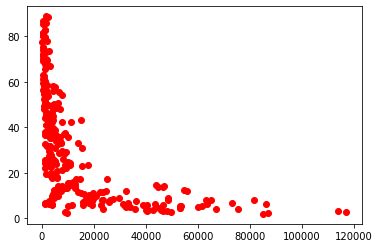

In [23]:
plt.scatter(df_features['GDP per capita'], df_target['Food Insecurity'], color='red')

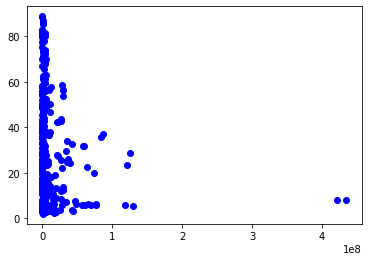

In [24]:
plt.scatter(df_features['Food Production'], df_target['Food Insecurity'], color='blue')

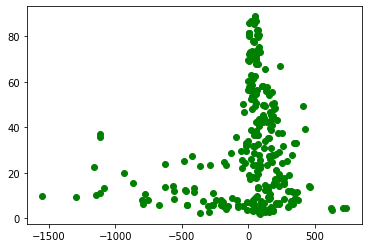

In [25]:
plt.scatter(df_features['Net imports per capita'], df_target['Food Insecurity'], color='green')

In [26]:

## normalize features
df_features_norm = normalize_z(df_features)
df_features_norm.head()

,GDP per capita,Food production per capita,Net imports per capita,Food Production
0,-0.681766,-0.465686,0.046409,-0.208504
1,-0.681213,-0.450294,0.062583,-0.197896
2,-0.449083,-0.291001,0.375870,-0.326379
3,-0.456986,-0.277008,0.363070,-0.325948
4,-0.514832,-0.501918,0.827779,-0.207302


In [27]:
## prepare features
X = prepare_feature(df_features_norm)
target = prepare_target(df_target)

print(X.shape)
print(target.shape)

(271, 5)
(271, 1)


In [28]:
## create model by finding beta
beta = np.zeros((4,1))
alpha = 0.01
n_iterations = 1500

beta, cost_history = gradient_descent(X, target, beta, alpha, n_iterations)

plt.plot(range(n_iterations), cost_history)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 5)

In [ ]:
## test the model

df_features_train, df_feature_test, df_target_train, df_target_test = split_data(df_features_norm, df_target, test_size=0.2)

df_features_train_z = normalize_z(df_features_train)

X_train = prepare_feature(df_features_train_z)

target_train = prepare_target(df_target_train)

print(X_train.shape)
print(target_train.shape)


In [ ]:
iterations = 1500
alpha = 0.01
beta = np.zeros((4,1))

# Call the gradient_descent function
beta, J_storage = gradient_descent(X_train, target_train, beta, alpha, iterations)

# call the predict() method
pred = predict(df_feature_test, beta)

In [ ]:
df_feature_test.columns

In [ ]:
plt.scatter(df_feature_test['GDP'], df_target_test)
plt.scatter(df_feature_test['GDP'], pred)